## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [2]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv('https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct')

In [3]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [4]:
data_df['date'] = data_df['date'].str.replace('T000000','')                                         # Remove T000000 part from data column. Hint: search about .str.replace() method. :)
data_array = data_df.drop('id', axis=1)                                              # Create a numpy array which does not have "id" field
data_array['date'] = pd.to_numeric(data_array['date'], errors='coerce')
assert (data_array.shape == (21613,20))

data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [5]:
mean = [np.mean(data_array[i]) for i in list(data_array)]                                  # this should be an array, each entry should be mean of a column
sd = [np.std(data_array[i]) for i in list(data_array)]                                    # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [6]:
labels = data_array_norm['price']                                                                                                            # extract the price column from data

x_array_norm = data_array_norm.drop('price', axis=1)                                                                                                      # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [7]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse = np.mean((y_pred-y_true)**2)                      # fill code here

  return mse

In [8]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x,a)+b                   # fill code here
  # print(f'(m,n) = ({m},{n}), a shape = {a.shape} y_pred shape = {y_pred.shape}')
  assert(y_pred.shape == (m,))
  return y_pred

In [9]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)

  da = (2/m) * np.dot(x.T, yp-y_true)            # write code to calculate derivative of loss with respect to a
  db = (2/m) * np.sum(yp-y_true)              # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [10]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.zeros(n)                                       # initialize a- weights and b- bias
  b = 0

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b

    da,db = gradient(x,a,b,y_true)
    a = a - learning_rate*da
    b = b - learning_rate*db

    l_mse = loss(np.dot(x,a)+b,y_true)                                # calculate loss at this point
    loss_mse.append(l_mse)

    # if i%100==99: print("Epoch ",i+1," Completed!","loss = ",l_mse)

  # print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [11]:
epochs = 10000            # tweak this!!!
learn_rate = 0.0001          # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train,y_train,learn_rate,epochs)

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  [0.3677277574392175]
10000 10000


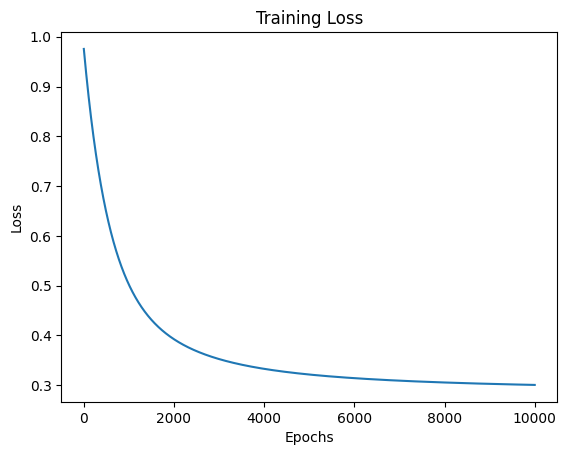

In [12]:
test_loss = [loss(y(x_test,a,b),y_test)]

print("Loss on test data = ",test_loss)

# Visualization of loss

epochsarr = np.array([i+1 for i in range(0,epochs)])
print(epochsarr.size, len(train_loss))

plt.plot(epochsarr, train_loss)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [13]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [14]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 0       1       0       6       8       

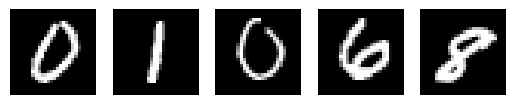

In [15]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [16]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0], -1)                                       # flatten the images of training set
x_test_flatten = x_test.reshape(x_test.shape[0], -1)                                        # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

#First I'd like to shuffle the data to ensure the model isn't biased
combined = list(zip(x_train_flatten, y_train))
np.random.shuffle(combined)
x_train_flatten[:], y_train[:] = zip(*combined)

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [21]:
import pydot
# import graphviz
from IPython.display import Image, display

model = keras.models.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='elu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True, to_file='model.png', show_layer_names=True)
display(Image('model.png'))
model.summary()

SyntaxError: invalid syntax (<ipython-input-21-fa3dc91fac96>, line 17)

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [18]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

n_epochs = 100              # set number of epochs
batch_size = 256            # you can tweak with these parametrs
history = model.fit(x_train_flatten, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_validation, y_validation), verbose=1)


Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.2042 - loss: 2.2540 - val_accuracy: 0.6235 - val_loss: 1.5328
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3302 - loss: 2.0924 - val_accuracy: 0.6893 - val_loss: 1.4213
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3483 - loss: 2.0675 - val_accuracy: 0.6986 - val_loss: 1.3953
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3555 - loss: 2.0545 - val_accuracy: 0.7424 - val_loss: 1.3636
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3719 - loss: 2.0245 - val_accuracy: 0.7366 - val_loss: 1.3155
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3779 - loss: 2.0155 - val_accuracy: 0.7623 - val_loss: 1.2871
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3864 - loss: 2.0020 - val_accuracy: 0.7829 - val_loss: 1.2744
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3867 - loss: 2.0055 - val_acc

### **Evaluate**
Evaluate your model on test data.

And Show some results

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9133 - loss: 0.9316
Loss =  0.9066604375839233
Accuracy =  92.40999817848206 %


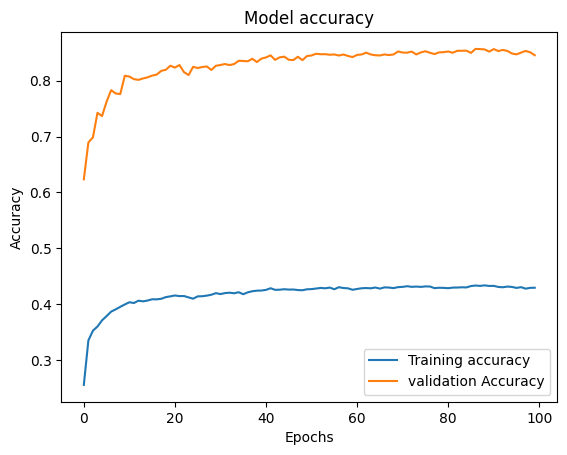

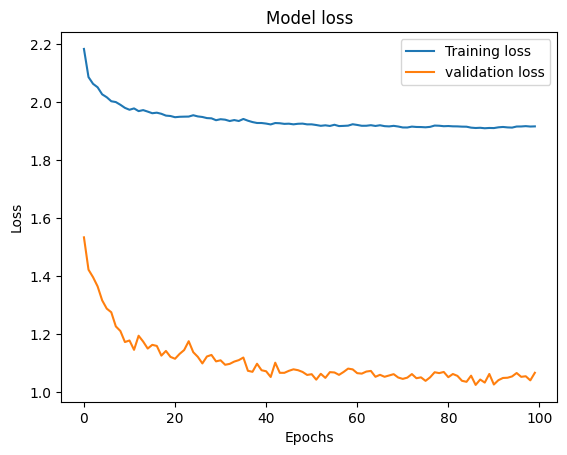

In [19]:
results = model.evaluate(x_test_flatten, y_test, batch_size=256)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

Label: 
Label: 3       Label: 8       Label: 3       Label: 4       Label: 8       

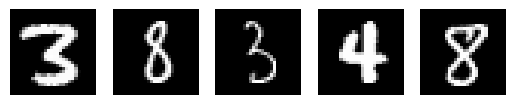

Predicted value: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predictions: [3, 8, 3, 4, 8]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

n = 5   # = no. of images to see predictions on

index = np.random.choice(len(x_test), n, replace=False)  # choose random index from test data
labels = []
predictions = []

print("Label: ")

for i, ind in enumerate(index):
    plt.subplot(1, n, i + 1)
    plt.imshow(x_test[ind].reshape(28, 28), cmap='gray')  # reshape and show images from test set
    plt.axis("off")
    labels.append(y_test[ind])
    print("Label:", y_test[ind], end="       ")

plt.show()
print("Predicted value: ")

# Collecting predictions for each image
for ind in index:
    prediction = np.argmax(model.predict(x_test[ind].reshape(1, 784)), axis=-1)
    predictions.append(prediction[0])

print("Predictions:", predictions)
